## **Определение оптимального количества кластеров**

### **[Метод локтя](https://habr.com/ru/companies/jetinfosystems/articles/467745/)**

### Метод локтя (Elbow Rule) – один из самых известных методов, с помощью которого вы можете выбрать правильное значение k и повысить производительность Модели (Model). Этот эмпирический метод вычисляет сумму квадратов расстояний между точками и вычисляет Среднее значение (Mean).

### Когда значение k равно 1, сумма квадрата внутри кластера будет большой. По мере увеличения значения k сумма квадратов расстояний внутри кластера будет уменьшаться.

### Наконец, мы построим график между значениями k и суммой квадрата внутри кластера, чтобы получить значение k. Мы внимательно рассмотрим график. В какой-то момент значение по оси x резко уменьшится. Эта точка будет считаться оптимальным значением k:

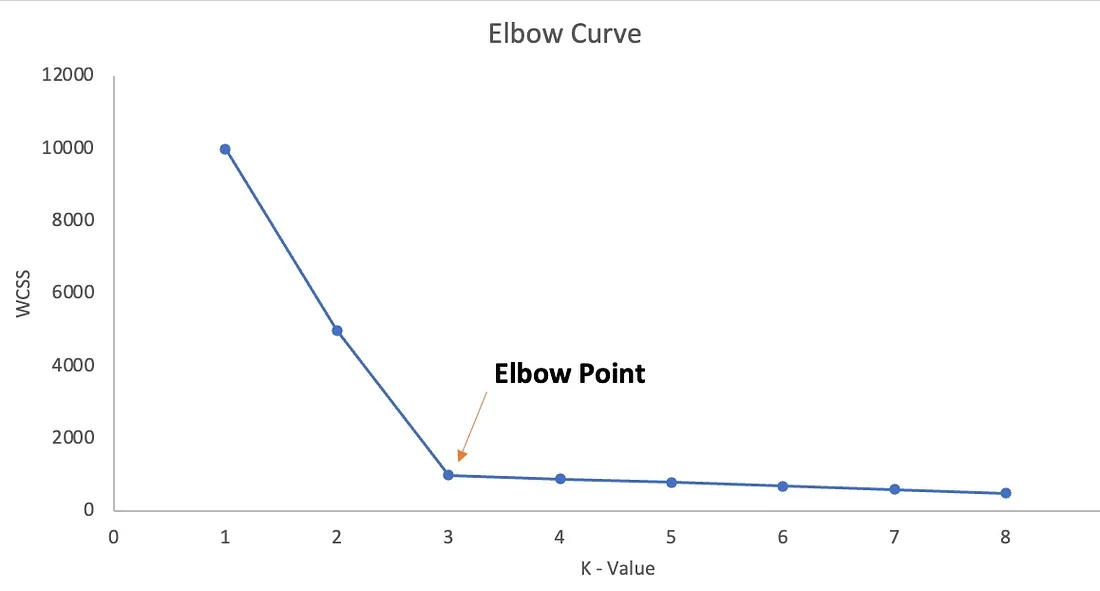

In [90]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [91]:
!wget -q -O 'Mall_Customers.csv' https://www.dropbox.com/s/3jkg3ekr8zfosyx/Mall_Customers.csv

In [92]:
# loading the dataset
dataset = pd.read_csv('Mall_Customers.csv')
 
# printing first five rows of the dataset
print(dataset.head(5))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [93]:
# printing the shape of dataset
print(dataset.shape)
 
# checking for any
# null values present
print(dataset.isnull().sum())

(200, 5)
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [94]:
# extracting values from two
# columns for clustering
dataset_new = dataset[['Annual Income (k$)',
                       'Spending Score (1-100)']].values

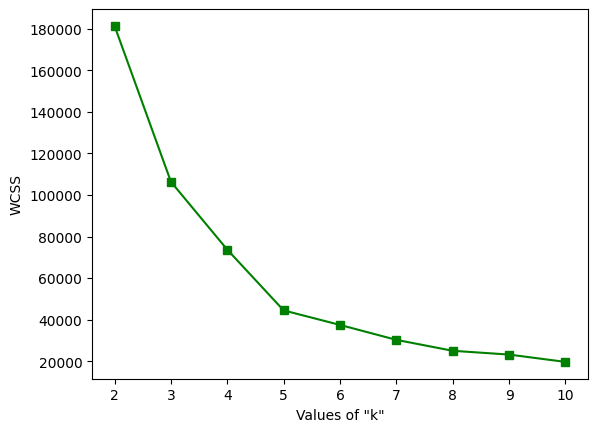

In [95]:
# determining the maximum number of clusters
# using the simple method
limit = int((dataset_new.shape[0]//2)**0.5)
 
# selecting optimal value of 'k'
# using elbow method
 
# wcss - within cluster sum of
# squared distances
wcss = {}
 
for k in range(2, limit + 1):
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(dataset_new)
    wcss[k] = model.inertia_
     
# plotting the wcss values
# to find out the elbow value
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

## Автоматизируем поиск оптимального значения кластеров методом локтя

[automated_elbow_method](https://github.com/ronikobrosly/automated_elbow_method)

In [96]:
!pip install autoelbow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
from autoelbow_rupakbob import autoelbow

# n = autoelbow.auto_elbow_search(dataset_new.select_dtypes(include=np.number).columns.tolist())
# print(n)

(300, 2)


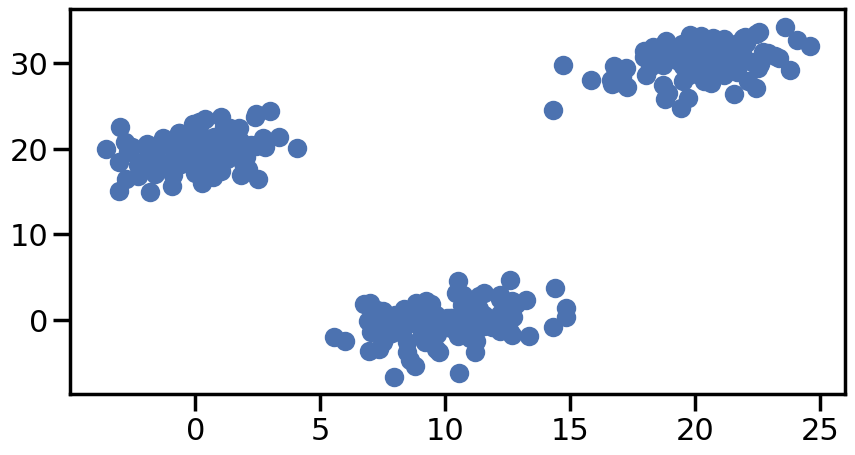

In [98]:
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
from pylab import rcParams

%matplotlib inline
sns.set_color_codes ()
sns.set_context ('poster')
warnings.filterwarnings ("ignore")
rcParams ['figure.figsize'] = 10, 5

np.random.seed(8)
# for repeatability of this tutorial
a = np.random.multivariate_normal ([10, 0], [[3, 1], [1, 4]], size= [100,])
b = np.random.multivariate_normal ([0, 20], [[3, 1], [1, 4]], size= [100,])
c = np.random.multivariate_normal ([20, 30], [[3, 1], [1, 4]], size=[100, ])
X = np. concatenate ((a, b, c))
print(X.shape)

plt.scatter(X[:,0], X[:,1], c='b')
plt.show ()
dist_points_from_cluster_center = []

[70403.82188589731, 27407.170343876776, 2311.403358628734, 1976.5540367939966, 1643.873532312429, 1337.0526214543424, 1166.1200538988498, 1036.87136535438, 945.4852416213884]


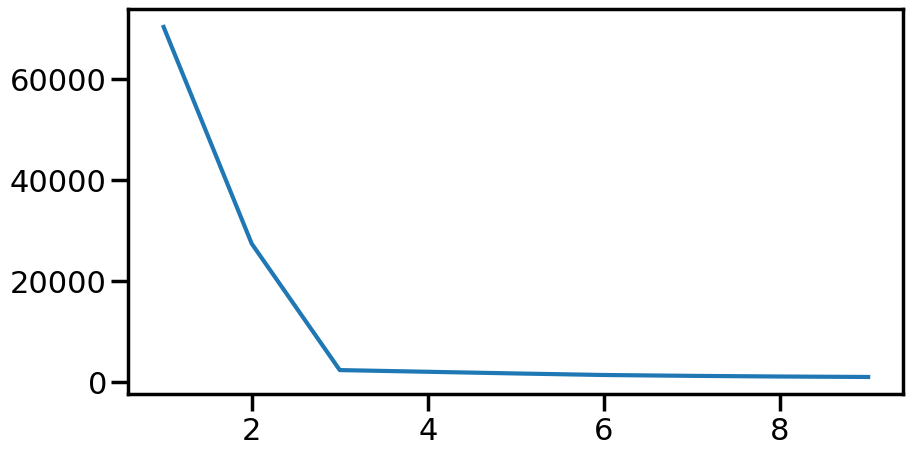

In [99]:
dist_points_from_cluster_center = []
K = range(1, 10)
for no_of_clusters in K:
    k_model = KMeans(n_clusters=no_of_clusters)
    k_model.fit(X)
    dist_points_from_cluster_center.append(k_model.inertia_)


print(dist_points_from_cluster_center)
plt.plot(K, dist_points_from_cluster_center);

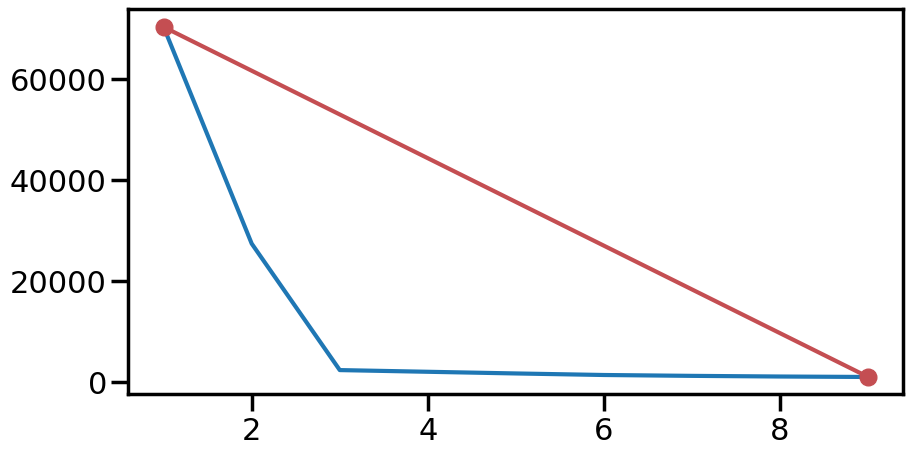

In [100]:
plt.plot(K, dist_points_from_cluster_center)
plt.plot([K[0], K[8]], [dist_points_from_cluster_center[0], 
                        dist_points_from_cluster_center[8]],
         'ro-')
plt.show()

In [101]:
import math


def calc_distance(x1, y1, a, b, c) :
    # Function to find distance
    # between a point and a line in 2-d
    d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b))

    return d

# (y1 - y2)x + (×2 - x1)y + (xly2 - x2y1) = 0
a = dist_points_from_cluster_center[0] - dist_points_from_cluster_center[8]
b = K[8] - K[0]
c1 = K[0] * dist_points_from_cluster_center[8]
c2 = K[8] * dist_points_from_cluster_center[0]
c = c1 - c2

a, b, c, c1, c2

(69458.33664427593,
 8,
 -632688.9117314544,
 945.4852416213884,
 633634.3969730758)

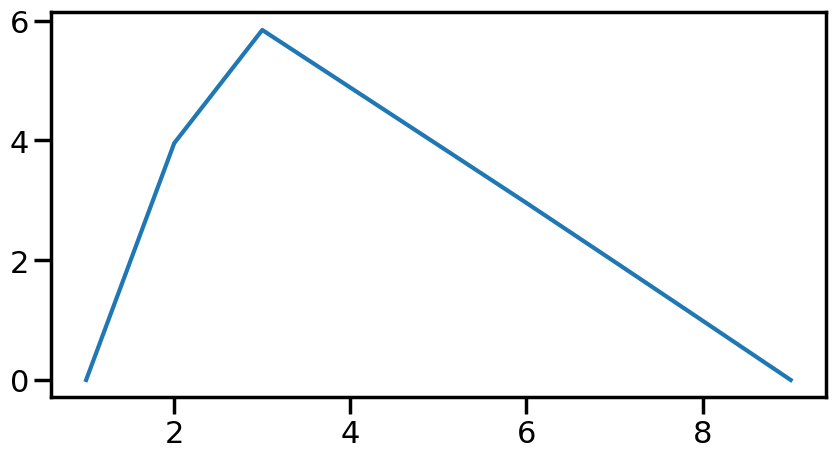

In [102]:
distance_of_points_from_line = []
for k in range(9):
    distance_of_points_from_line.append(calc_distance(K[k], 
                                                      dist_points_from_cluster_center[k], 
                                                      a, 
                                                      b, 
                                                      c))
plt.plot(K, distance_of_points_from_line)

In [103]:
max_index = distance_of_points_from_line.index(max(distance_of_points_from_line)) + 1
print(f"Оптимальное значение кластеров K = {max_index}")

Оптимальное значение кластеров K = 3


### **Метод силуэта (Silhouette Method или Silhouette Score)**

### Метод силуэтов – способ изучения разделительного расстояния между результирующими кластерами Наблюдений (Observation), часто используемый вместе с Методом K-средних (K-Means). График силуэта отображает меру того, насколько близко каждая точка в одном кластере находится к точкам в соседних кластерах, и, таким образом, обеспечивает способ визуальной оценки количества кластеров. Эта мера имеет диапазон [-1, 1]:

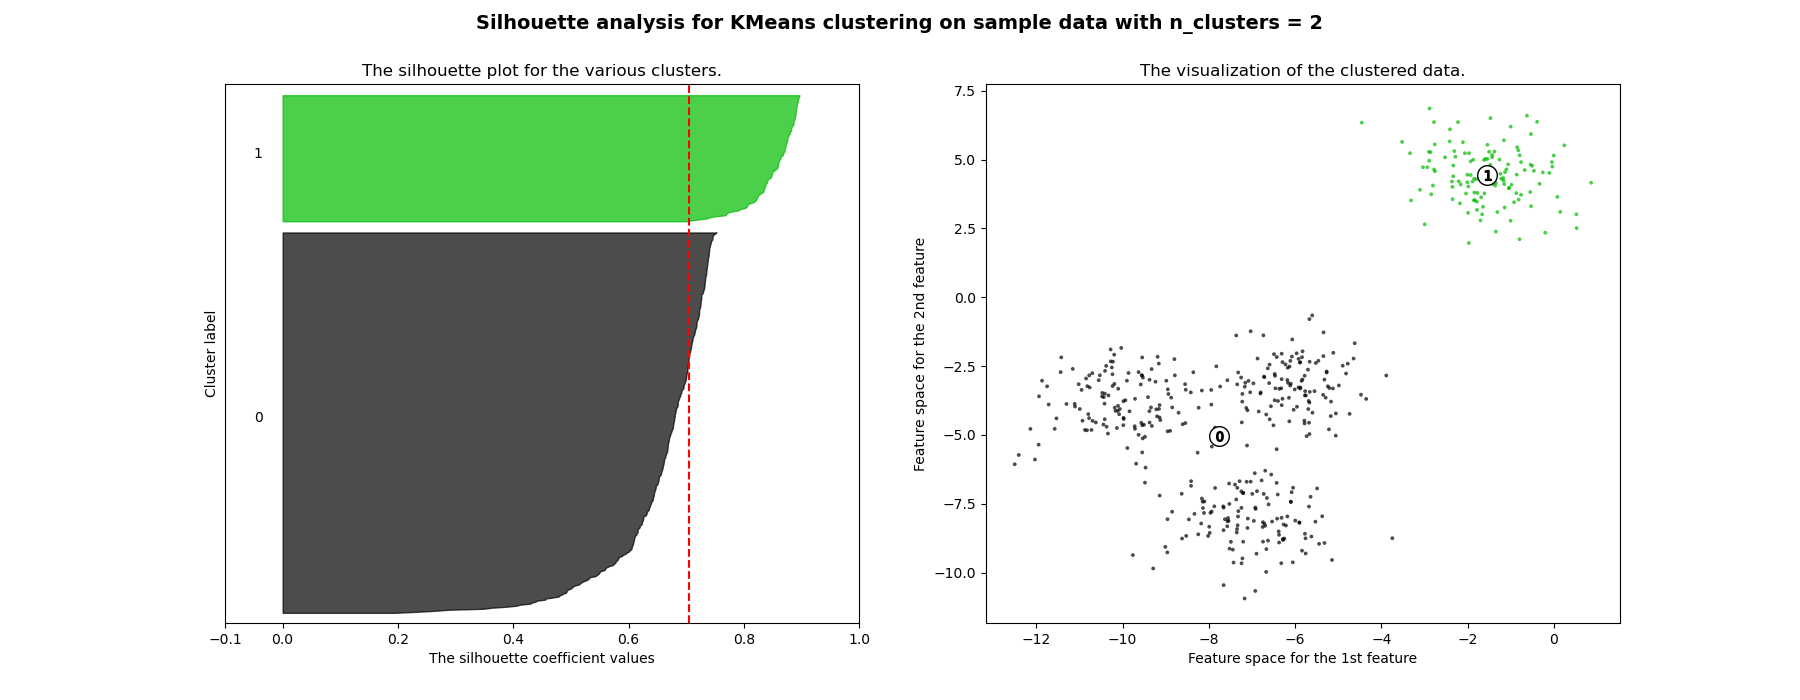

### силуэт – одна из цветных фигур на субграфике справа
### Коэффициенты силуэта (так называются эти значения) около +1 указывают на то, что образец находится далеко от соседних кластеров. Значение, близкое к нулю указывает, что выборка находится на границе принятия решения между двумя соседними кластерами или очень близко к ней, а отрицательные значения указывают на то, что эти выборки могли быть назначены неправильному кластеру.

In [104]:
from sklearn.metrics import silhouette_score

# determining the maximum number of clusters
# using the simple method
limit = int((dataset_new.shape[0]//2)**0.5)
 
# determining number of clusters
# using silhouette score method
for k in range(2, limit + 1):
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(dataset_new)
    pred = model.predict(dataset_new)
    score = silhouette_score(dataset_new, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 2: 0.297
Silhouette Score for k = 3: 0.468
Silhouette Score for k = 4: 0.494
Silhouette Score for k = 5: 0.554
Silhouette Score for k = 6: 0.542
Silhouette Score for k = 7: 0.532
Silhouette Score for k = 8: 0.456
Silhouette Score for k = 9: 0.457
Silhouette Score for k = 10: 0.449


In [105]:
#install yellowbrick to vizualize the Elbow curve
!pip install -q yellowbrick  

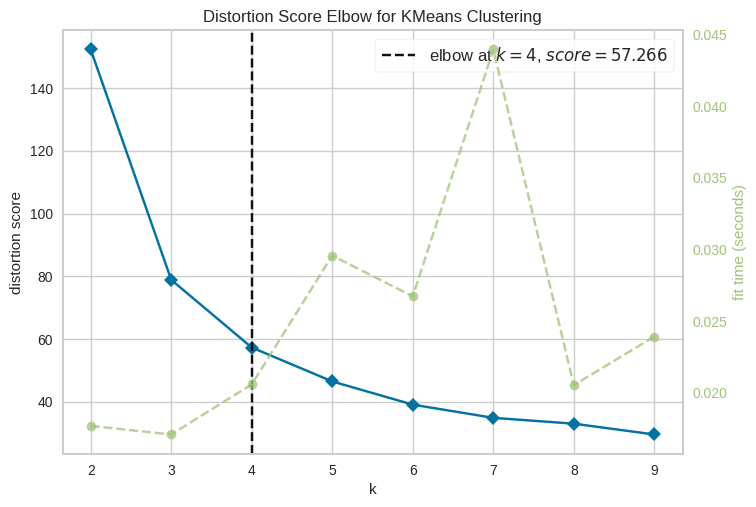

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [106]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42, n_init='auto')
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Silhouette Score for k = 2: 0.681
Silhouette Score for k = 3: 0.551
Silhouette Score for k = 4: 0.497
Silhouette Score for k = 5: 0.489


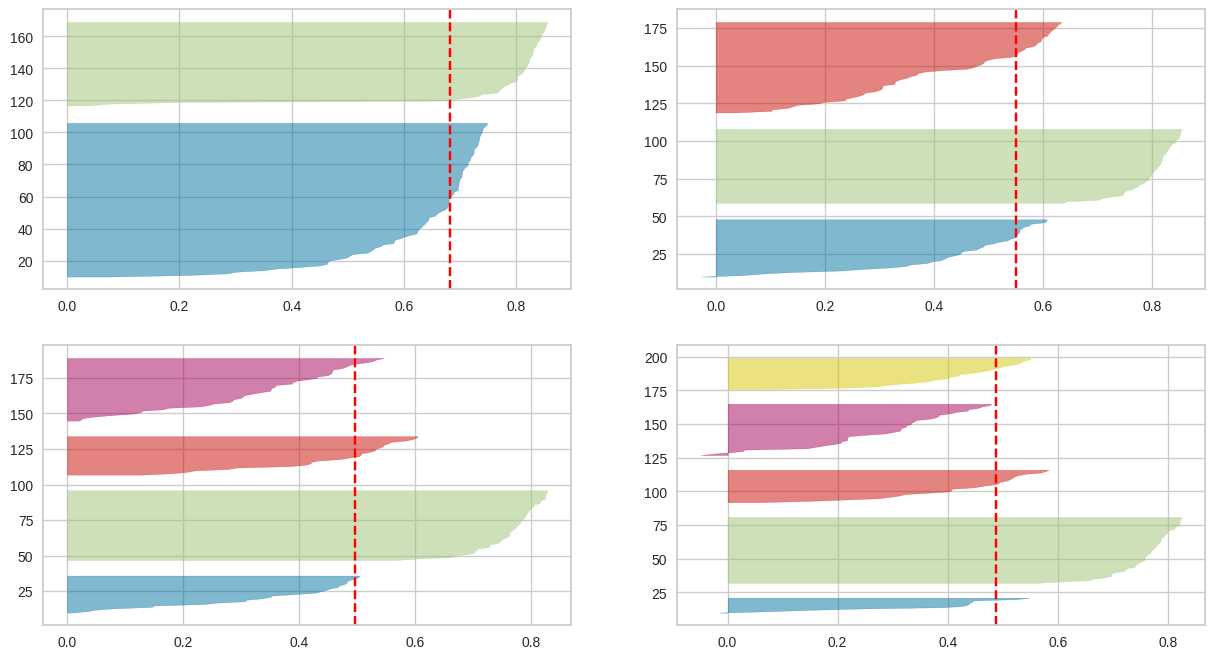

In [107]:
from sklearn import datasets
from yellowbrick.cluster import SilhouetteVisualizer

# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
  
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    km.fit(X)
    pred = km.predict(X)
    score = silhouette_score(X, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(i, score))
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Оценка силуэта максимальна (0,68) для K = 2, но этого недостаточно для выбора оптимального K.

Следующие условия должны быть проверены, чтобы выбрать правильный «K», используя графики силуэта:

Для определенного K все кластеры должны иметь оценку силуэта больше, чем средняя оценка набора данных (обозначенная красной пунктирной линией). Ось X представляет оценку силуэта. Кластеры с K = 4 и 5 исключаются, так как они не соблюдают это условие.
Не должно быть больших колебаний в размерах кластеров. Ширина кластеров представляет количество точек данных. При K = 2 синий кластер имеет почти вдвое большую ширину по сравнению с зеленым кластером. Этот синий кластер разбивается на 2 подкластера для K = 3 и, таким образом, образует кластеры одинакового размера.
Таким образом, подход с графиком Силуэта дает нам K = 3 как оптимальное значение.

Мы должны выбрать K = 3 для окончательной кластеризации набора данных Iris.

In [108]:
import plotly.graph_objects as go  #for 3D plot

## K-means using k = 3
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

## 3D plot 
Scene = dict(xaxis = dict(title  = 'sepal_length -->'),
             yaxis = dict(title  = 'sepal_width--->'),
             zaxis = dict(title  = 'petal_length-->'))

labels = kmeans.labels_
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers', marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

## Автоматизируем поиск оптимального значения кластеров через оценку силуэта

Best K: 9


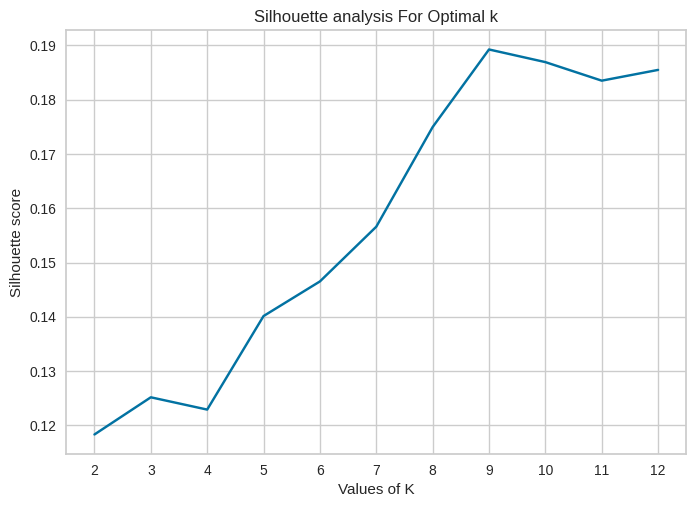

In [109]:
data, labels = datasets.load_digits(return_X_y=True)

silhouette_avg = []
for num_clusters in list(range(2, 13)):
    kmeans = KMeans(n_clusters=num_clusters, init = "k-means++", n_init='auto')
    kmeans.fit_predict(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_avg.append(score)

plt.plot(np.arange(2, 13),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
_ = plt.xticks(np.arange(2, 13))

print (f"Best K: {np.argmax(silhouette_avg) + 2}")